## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  24.055265  1044.645685  0.244482  2.342146  1.527122
1  53.420663   900.970475  0.208337  7.081337  1.339322
2  58.277076   770.207079  0.357241  7.277961  1.374384
3  67.177407   269.213596  0.584036  1.620995  1.213024
4  47.090194  1572.813636  0.121006  7.666590  1.277752


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.18029 | train_mse: 2.65494 | train_mae: 1.1738  |  0:00:00s
epoch 1  | loss: 0.76516 | train_mse: 1.65411 | train_mae: 1.00159 |  0:00:00s
epoch 2  | loss: 0.48214 | train_mse: 1.35399 | train_mae: 0.89766 |  0:00:00s


epoch 3  | loss: 0.54616 | train_mse: 1.15468 | train_mae: 0.82918 |  0:00:00s
epoch 4  | loss: 0.48064 | train_mse: 1.04827 | train_mae: 0.77975 |  0:00:00s
epoch 5  | loss: 0.49858 | train_mse: 1.05271 | train_mae: 0.7813  |  0:00:00s


epoch 6  | loss: 0.4893  | train_mse: 0.79833 | train_mae: 0.70265 |  0:00:00s
epoch 7  | loss: 0.40356 | train_mse: 0.66657 | train_mae: 0.63261 |  0:00:00s
epoch 8  | loss: 0.29084 | train_mse: 0.72127 | train_mae: 0.62328 |  0:00:00s


epoch 9  | loss: 0.33892 | train_mse: 0.85315 | train_mae: 0.67561 |  0:00:01s
epoch 10 | loss: 0.35537 | train_mse: 0.97156 | train_mae: 0.73467 |  0:00:01s
epoch 11 | loss: 0.3518  | train_mse: 0.79472 | train_mae: 0.65157 |  0:00:01s


epoch 12 | loss: 0.3219  | train_mse: 0.59889 | train_mae: 0.57904 |  0:00:01s
epoch 13 | loss: 0.21973 | train_mse: 0.72266 | train_mae: 0.60198 |  0:00:01s
epoch 14 | loss: 0.43606 | train_mse: 0.67819 | train_mae: 0.55887 |  0:00:01s


epoch 15 | loss: 0.2339  | train_mse: 0.43543 | train_mae: 0.4432  |  0:00:01s
epoch 16 | loss: 0.26658 | train_mse: 0.38725 | train_mae: 0.42004 |  0:00:01s
epoch 17 | loss: 0.36479 | train_mse: 0.36193 | train_mae: 0.40492 |  0:00:01s


epoch 18 | loss: 0.36532 | train_mse: 0.296   | train_mae: 0.38323 |  0:00:01s
epoch 19 | loss: 0.26512 | train_mse: 0.2678  | train_mae: 0.37817 |  0:00:01s
epoch 20 | loss: 0.31267 | train_mse: 0.21632 | train_mae: 0.34701 |  0:00:01s


epoch 21 | loss: 0.25447 | train_mse: 0.19891 | train_mae: 0.33654 |  0:00:02s
epoch 22 | loss: 0.4148  | train_mse: 0.21649 | train_mae: 0.3462  |  0:00:02s
epoch 23 | loss: 0.29038 | train_mse: 0.20115 | train_mae: 0.33955 |  0:00:02s


epoch 24 | loss: 0.29753 | train_mse: 0.22851 | train_mae: 0.3394  |  0:00:02s
epoch 25 | loss: 0.22234 | train_mse: 0.25613 | train_mae: 0.35797 |  0:00:02s
epoch 26 | loss: 0.29135 | train_mse: 0.25904 | train_mae: 0.36687 |  0:00:02s


epoch 27 | loss: 0.23778 | train_mse: 0.45465 | train_mae: 0.49239 |  0:00:02s
epoch 28 | loss: 0.38064 | train_mse: 0.40664 | train_mae: 0.46156 |  0:00:02s
epoch 29 | loss: 0.2279  | train_mse: 0.44129 | train_mae: 0.46832 |  0:00:02s


epoch 30 | loss: 0.19249 | train_mse: 0.35753 | train_mae: 0.41723 |  0:00:02s
epoch 31 | loss: 0.2136  | train_mse: 0.35347 | train_mae: 0.42401 |  0:00:02s
epoch 32 | loss: 0.36558 | train_mse: 0.35316 | train_mae: 0.42875 |  0:00:02s


epoch 33 | loss: 0.35699 | train_mse: 0.24142 | train_mae: 0.38526 |  0:00:03s
epoch 34 | loss: 0.38044 | train_mse: 0.19931 | train_mae: 0.34056 |  0:00:03s
epoch 35 | loss: 0.17966 | train_mse: 0.18896 | train_mae: 0.30968 |  0:00:03s


epoch 36 | loss: 0.24423 | train_mse: 0.17495 | train_mae: 0.31159 |  0:00:03s
epoch 37 | loss: 0.21338 | train_mse: 0.17165 | train_mae: 0.32536 |  0:00:03s
epoch 38 | loss: 0.14672 | train_mse: 0.29144 | train_mae: 0.41389 |  0:00:03s


epoch 39 | loss: 0.26293 | train_mse: 0.45194 | train_mae: 0.48213 |  0:00:03s
epoch 40 | loss: 0.21292 | train_mse: 0.34374 | train_mae: 0.43621 |  0:00:03s
epoch 41 | loss: 0.23705 | train_mse: 0.21735 | train_mae: 0.37447 |  0:00:03s


epoch 42 | loss: 0.16571 | train_mse: 0.22701 | train_mae: 0.38087 |  0:00:03s
epoch 43 | loss: 0.27406 | train_mse: 0.20168 | train_mae: 0.35455 |  0:00:03s
epoch 44 | loss: 0.18174 | train_mse: 0.19695 | train_mae: 0.34476 |  0:00:03s


epoch 45 | loss: 0.31922 | train_mse: 0.28306 | train_mae: 0.38119 |  0:00:03s
epoch 46 | loss: 0.1603  | train_mse: 0.34359 | train_mae: 0.39987 |  0:00:04s
epoch 47 | loss: 0.19972 | train_mse: 0.35978 | train_mae: 0.42416 |  0:00:04s


epoch 48 | loss: 0.14722 | train_mse: 0.33398 | train_mae: 0.42822 |  0:00:04s
epoch 49 | loss: 0.18132 | train_mse: 0.291   | train_mae: 0.38143 |  0:00:04s
epoch 50 | loss: 0.2369  | train_mse: 0.26745 | train_mae: 0.35038 |  0:00:04s


epoch 51 | loss: 0.12633 | train_mse: 0.24585 | train_mae: 0.34762 |  0:00:04s
epoch 52 | loss: 0.11266 | train_mse: 0.24904 | train_mae: 0.3484  |  0:00:04s
epoch 53 | loss: 0.11513 | train_mse: 0.24338 | train_mae: 0.35519 |  0:00:04s


epoch 54 | loss: 0.10388 | train_mse: 0.23145 | train_mae: 0.34775 |  0:00:04s
epoch 55 | loss: 0.13347 | train_mse: 0.24114 | train_mae: 0.3564  |  0:00:04s
epoch 56 | loss: 0.14766 | train_mse: 0.30535 | train_mae: 0.38491 |  0:00:04s


epoch 57 | loss: 0.10632 | train_mse: 0.26987 | train_mae: 0.35891 |  0:00:04s
epoch 58 | loss: 0.265   | train_mse: 0.27862 | train_mae: 0.37525 |  0:00:05s
epoch 59 | loss: 0.10577 | train_mse: 0.20832 | train_mae: 0.3248  |  0:00:05s


epoch 60 | loss: 0.26028 | train_mse: 0.17437 | train_mae: 0.30108 |  0:00:05s
epoch 61 | loss: 0.13969 | train_mse: 0.14035 | train_mae: 0.27863 |  0:00:05s


epoch 62 | loss: 0.12161 | train_mse: 0.15548 | train_mae: 0.3027  |  0:00:05s
epoch 63 | loss: 0.25653 | train_mse: 0.17421 | train_mae: 0.31657 |  0:00:05s


epoch 64 | loss: 0.1276  | train_mse: 0.13067 | train_mae: 0.25943 |  0:00:05s
epoch 65 | loss: 0.08782 | train_mse: 0.14151 | train_mae: 0.27007 |  0:00:06s


epoch 66 | loss: 0.14161 | train_mse: 0.1754  | train_mae: 0.30663 |  0:00:06s
epoch 67 | loss: 0.2167  | train_mse: 0.16004 | train_mae: 0.30081 |  0:00:06s


epoch 68 | loss: 0.1896  | train_mse: 0.14371 | train_mae: 0.29277 |  0:00:06s
epoch 69 | loss: 0.17552 | train_mse: 0.14321 | train_mae: 0.26907 |  0:00:06s


epoch 70 | loss: 0.14341 | train_mse: 0.09078 | train_mae: 0.23734 |  0:00:06s
epoch 71 | loss: 0.1698  | train_mse: 0.07167 | train_mae: 0.22298 |  0:00:06s


epoch 72 | loss: 0.17564 | train_mse: 0.09952 | train_mae: 0.24602 |  0:00:06s
epoch 73 | loss: 0.1986  | train_mse: 0.11213 | train_mae: 0.25113 |  0:00:06s


epoch 74 | loss: 0.18092 | train_mse: 0.12256 | train_mae: 0.27319 |  0:00:07s
epoch 75 | loss: 0.1144  | train_mse: 0.1369  | train_mae: 0.28974 |  0:00:07s
epoch 76 | loss: 0.19927 | train_mse: 0.13447 | train_mae: 0.2855  |  0:00:07s


epoch 77 | loss: 0.10218 | train_mse: 0.12016 | train_mae: 0.27445 |  0:00:07s
epoch 78 | loss: 0.26064 | train_mse: 0.09225 | train_mae: 0.24429 |  0:00:07s
epoch 79 | loss: 0.12833 | train_mse: 0.07761 | train_mae: 0.22722 |  0:00:07s


epoch 80 | loss: 0.14198 | train_mse: 0.07891 | train_mae: 0.22347 |  0:00:07s
epoch 81 | loss: 0.16375 | train_mse: 0.0746  | train_mae: 0.21806 |  0:00:07s
epoch 82 | loss: 0.09363 | train_mse: 0.07829 | train_mae: 0.22311 |  0:00:07s


epoch 83 | loss: 0.11838 | train_mse: 0.08076 | train_mae: 0.22698 |  0:00:07s
epoch 84 | loss: 0.1314  | train_mse: 0.08097 | train_mae: 0.22855 |  0:00:07s
epoch 85 | loss: 0.13208 | train_mse: 0.08336 | train_mae: 0.22926 |  0:00:08s


epoch 86 | loss: 0.2287  | train_mse: 0.07887 | train_mae: 0.22791 |  0:00:08s
epoch 87 | loss: 0.08722 | train_mse: 0.068   | train_mae: 0.21509 |  0:00:08s
epoch 88 | loss: 0.0826  | train_mse: 0.0687  | train_mae: 0.20771 |  0:00:08s


epoch 89 | loss: 0.10745 | train_mse: 0.0746  | train_mae: 0.2109  |  0:00:08s
epoch 90 | loss: 0.1203  | train_mse: 0.08007 | train_mae: 0.22021 |  0:00:08s
epoch 91 | loss: 0.09914 | train_mse: 0.08959 | train_mae: 0.23117 |  0:00:08s


epoch 92 | loss: 0.22453 | train_mse: 0.1097  | train_mae: 0.24926 |  0:00:08s
epoch 93 | loss: 0.14905 | train_mse: 0.12995 | train_mae: 0.27324 |  0:00:08s
epoch 94 | loss: 0.10002 | train_mse: 0.0983  | train_mae: 0.24139 |  0:00:08s


epoch 95 | loss: 0.09939 | train_mse: 0.08268 | train_mae: 0.23556 |  0:00:08s
epoch 96 | loss: 0.17162 | train_mse: 0.07361 | train_mae: 0.21845 |  0:00:09s
epoch 97 | loss: 0.15467 | train_mse: 0.10309 | train_mae: 0.2457  |  0:00:09s


epoch 98 | loss: 0.14003 | train_mse: 0.11022 | train_mae: 0.24887 |  0:00:09s
epoch 99 | loss: 0.12666 | train_mse: 0.09849 | train_mae: 0.23305 |  0:00:09s
epoch 100| loss: 0.10867 | train_mse: 0.0824  | train_mae: 0.2201  |  0:00:09s


epoch 101| loss: 0.0752  | train_mse: 0.07762 | train_mae: 0.21553 |  0:00:09s
epoch 102| loss: 0.1011  | train_mse: 0.07574 | train_mae: 0.20962 |  0:00:09s
epoch 103| loss: 0.06634 | train_mse: 0.07412 | train_mae: 0.20637 |  0:00:09s


epoch 104| loss: 0.06937 | train_mse: 0.07646 | train_mae: 0.20622 |  0:00:09s
epoch 105| loss: 0.17989 | train_mse: 0.06037 | train_mae: 0.19185 |  0:00:09s
epoch 106| loss: 0.08019 | train_mse: 0.04911 | train_mae: 0.17476 |  0:00:09s


epoch 107| loss: 0.05394 | train_mse: 0.05199 | train_mae: 0.18201 |  0:00:10s
epoch 108| loss: 0.08878 | train_mse: 0.05104 | train_mae: 0.18073 |  0:00:10s
epoch 109| loss: 0.09585 | train_mse: 0.05856 | train_mae: 0.19199 |  0:00:10s


epoch 110| loss: 0.09124 | train_mse: 0.06528 | train_mae: 0.19839 |  0:00:10s
epoch 111| loss: 0.0689  | train_mse: 0.06733 | train_mae: 0.19982 |  0:00:10s
epoch 112| loss: 0.27406 | train_mse: 0.05798 | train_mae: 0.18761 |  0:00:10s


epoch 113| loss: 0.16333 | train_mse: 0.05916 | train_mae: 0.18908 |  0:00:10s
epoch 114| loss: 0.22957 | train_mse: 0.06744 | train_mae: 0.20304 |  0:00:10s
epoch 115| loss: 0.09365 | train_mse: 0.05864 | train_mae: 0.19263 |  0:00:10s


epoch 116| loss: 0.15282 | train_mse: 0.05577 | train_mae: 0.18129 |  0:00:10s
epoch 117| loss: 0.06639 | train_mse: 0.05147 | train_mae: 0.17071 |  0:00:10s
epoch 118| loss: 0.15247 | train_mse: 0.05838 | train_mae: 0.18262 |  0:00:11s


epoch 119| loss: 0.12855 | train_mse: 0.05962 | train_mae: 0.18836 |  0:00:11s
epoch 120| loss: 0.12815 | train_mse: 0.07077 | train_mae: 0.2003  |  0:00:11s
epoch 121| loss: 0.11752 | train_mse: 0.08546 | train_mae: 0.21205 |  0:00:11s


epoch 122| loss: 0.14148 | train_mse: 0.09128 | train_mae: 0.2207  |  0:00:11s
epoch 123| loss: 0.0794  | train_mse: 0.09315 | train_mae: 0.21933 |  0:00:11s


epoch 124| loss: 0.10571 | train_mse: 0.08468 | train_mae: 0.2114  |  0:00:11s
epoch 125| loss: 0.17247 | train_mse: 0.06769 | train_mae: 0.19905 |  0:00:11s


epoch 126| loss: 0.1914  | train_mse: 0.04535 | train_mae: 0.16675 |  0:00:11s
epoch 127| loss: 0.13845 | train_mse: 0.03823 | train_mae: 0.15589 |  0:00:11s
epoch 128| loss: 0.109   | train_mse: 0.0466  | train_mae: 0.17408 |  0:00:11s


epoch 129| loss: 0.16312 | train_mse: 0.05688 | train_mae: 0.1844  |  0:00:12s
epoch 130| loss: 0.15269 | train_mse: 0.05484 | train_mae: 0.17875 |  0:00:12s
epoch 131| loss: 0.06734 | train_mse: 0.05444 | train_mae: 0.17812 |  0:00:12s


epoch 132| loss: 0.09743 | train_mse: 0.06842 | train_mae: 0.20063 |  0:00:12s
epoch 133| loss: 0.07262 | train_mse: 0.078   | train_mae: 0.21298 |  0:00:12s
epoch 134| loss: 0.06545 | train_mse: 0.07835 | train_mae: 0.21499 |  0:00:12s


epoch 135| loss: 0.06201 | train_mse: 0.0897  | train_mae: 0.22763 |  0:00:12s
epoch 136| loss: 0.06587 | train_mse: 0.09575 | train_mae: 0.23267 |  0:00:12s
epoch 137| loss: 0.16444 | train_mse: 0.08259 | train_mae: 0.22183 |  0:00:12s


epoch 138| loss: 0.08546 | train_mse: 0.08816 | train_mae: 0.22684 |  0:00:12s
epoch 139| loss: 0.13375 | train_mse: 0.1013  | train_mae: 0.23675 |  0:00:12s
epoch 140| loss: 0.11629 | train_mse: 0.07914 | train_mae: 0.20462 |  0:00:12s


epoch 141| loss: 0.0959  | train_mse: 0.05047 | train_mae: 0.17551 |  0:00:13s
epoch 142| loss: 0.09335 | train_mse: 0.04801 | train_mae: 0.17769 |  0:00:13s
epoch 143| loss: 0.08756 | train_mse: 0.05642 | train_mae: 0.18874 |  0:00:13s


epoch 144| loss: 0.10483 | train_mse: 0.06035 | train_mae: 0.19312 |  0:00:13s
epoch 145| loss: 0.08287 | train_mse: 0.08179 | train_mae: 0.21205 |  0:00:13s
epoch 146| loss: 0.10497 | train_mse: 0.08725 | train_mae: 0.2244  |  0:00:13s


epoch 147| loss: 0.11419 | train_mse: 0.07215 | train_mae: 0.20476 |  0:00:13s
epoch 148| loss: 0.11104 | train_mse: 0.07552 | train_mae: 0.21149 |  0:00:13s
epoch 149| loss: 0.08261 | train_mse: 0.07471 | train_mae: 0.21013 |  0:00:13s


epoch 150| loss: 0.1123  | train_mse: 0.0817  | train_mae: 0.2105  |  0:00:13s
epoch 151| loss: 0.11045 | train_mse: 0.06496 | train_mae: 0.19288 |  0:00:13s
epoch 152| loss: 0.09508 | train_mse: 0.0596  | train_mae: 0.18886 |  0:00:14s


epoch 153| loss: 0.09485 | train_mse: 0.05261 | train_mae: 0.17798 |  0:00:14s
epoch 154| loss: 0.0816  | train_mse: 0.04375 | train_mae: 0.16805 |  0:00:14s
epoch 155| loss: 0.05495 | train_mse: 0.06452 | train_mae: 0.20502 |  0:00:14s


epoch 156| loss: 0.1691  | train_mse: 0.0635  | train_mae: 0.19751 |  0:00:14s
epoch 157| loss: 0.08872 | train_mse: 0.0444  | train_mae: 0.16734 |  0:00:14s
epoch 158| loss: 0.10248 | train_mse: 0.04544 | train_mae: 0.17068 |  0:00:14s


epoch 159| loss: 0.10064 | train_mse: 0.05328 | train_mae: 0.1781  |  0:00:14s
epoch 160| loss: 0.10267 | train_mse: 0.05926 | train_mae: 0.1807  |  0:00:14s
epoch 161| loss: 0.13942 | train_mse: 0.07214 | train_mae: 0.19953 |  0:00:14s


epoch 162| loss: 0.07947 | train_mse: 0.08228 | train_mae: 0.21277 |  0:00:14s
epoch 163| loss: 0.10332 | train_mse: 0.07873 | train_mae: 0.21367 |  0:00:14s
epoch 164| loss: 0.15853 | train_mse: 0.04878 | train_mae: 0.16975 |  0:00:15s


epoch 165| loss: 0.09929 | train_mse: 0.04628 | train_mae: 0.16711 |  0:00:15s
epoch 166| loss: 0.09485 | train_mse: 0.04904 | train_mae: 0.16799 |  0:00:15s
epoch 167| loss: 0.05553 | train_mse: 0.05858 | train_mae: 0.17755 |  0:00:15s


epoch 168| loss: 0.13506 | train_mse: 0.05088 | train_mae: 0.16755 |  0:00:15s
epoch 169| loss: 0.09391 | train_mse: 0.05896 | train_mae: 0.17472 |  0:00:15s
epoch 170| loss: 0.11664 | train_mse: 0.07465 | train_mae: 0.19789 |  0:00:15s


epoch 171| loss: 0.08236 | train_mse: 0.09166 | train_mae: 0.21495 |  0:00:15s
epoch 172| loss: 0.18278 | train_mse: 0.12714 | train_mae: 0.23964 |  0:00:15s
epoch 173| loss: 0.11088 | train_mse: 0.15098 | train_mae: 0.25128 |  0:00:15s


epoch 174| loss: 0.0897  | train_mse: 0.22879 | train_mae: 0.29214 |  0:00:15s
epoch 175| loss: 0.06633 | train_mse: 0.11242 | train_mae: 0.22754 |  0:00:15s
epoch 176| loss: 0.07724 | train_mse: 0.08314 | train_mae: 0.20754 |  0:00:16s


epoch 177| loss: 0.14313 | train_mse: 0.08251 | train_mae: 0.2055  |  0:00:16s

Early stopping occurred at epoch 177 with best_epoch = 127 and best_train_mae = 0.15589
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

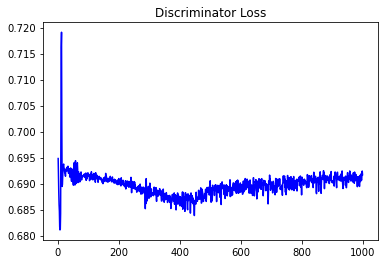

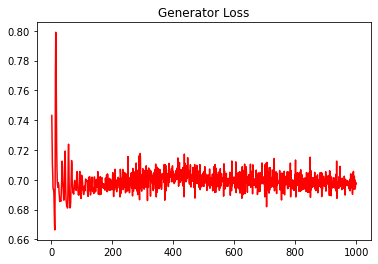

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.48554651554394523


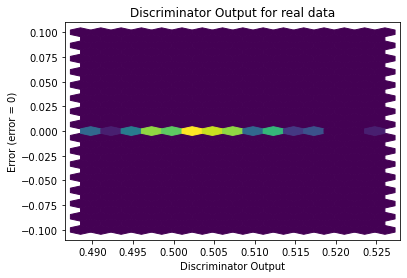

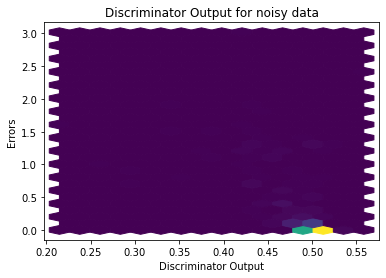

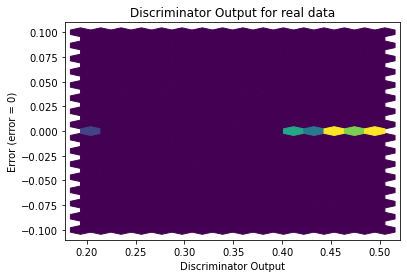

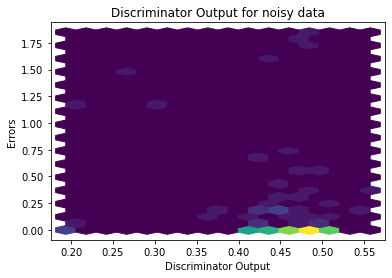

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


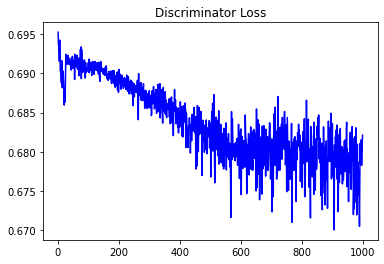

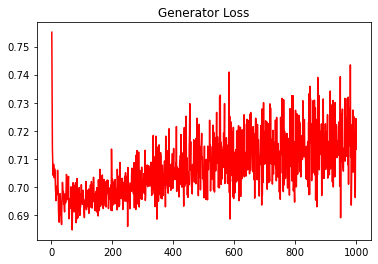

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2065162115846771


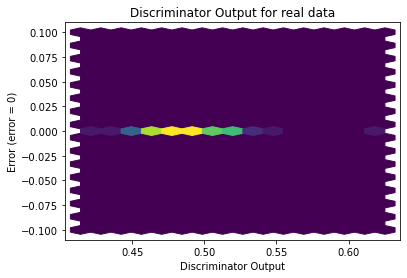

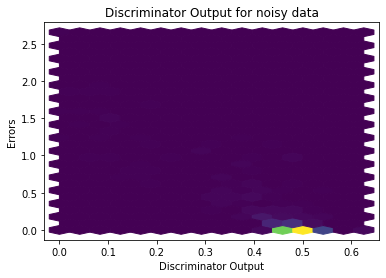

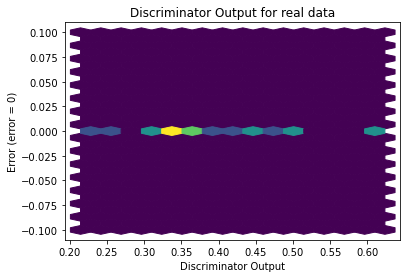

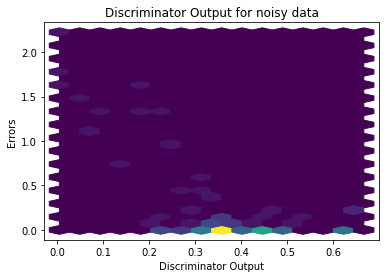

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4920]], requires_grad=True)
